<a href="https://colab.research.google.com/github/ReutEdvi/pandas/blob/main/PandasDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                            Welcome to the **BIG DATA LABORATORY**



In [7]:
import pandas as pd
import numpy as np

In [8]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/titanic.csv')

In [9]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
585,586,1.0,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.650,...,S,293.0,"Taussig, Miss Ruth",18.0,"New York, New York, US",Southampton,"New York, New York, US",8,NaN,1.0
864,865,0.0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.000,...,S,426.0,"Gill, Mr. John William",24.0,"Clevedon, North Somerset England",Southampton,New York City,NaN,155MB,2.0
764,765,0.0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.775,...,S,795.0,"Eklund, Mr. Hans Linus",16.0,"Kårberg, Örebro, Sweden",Southampton,"Jerome Junction, Arizona, US",NaN,NaN,3.0
350,351,0.0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.225,...,S,1090.0,"Ödahl, Mr. Nils Martin",23.0,"Örsjö, Kalmar, Sweden",Southampton,"Peoria, Illinois, US",NaN,NaN,3.0
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,...,S,184.0,"and maid, Miss Roberta Elizabeth Mary ""Cissy"" ...",20.0,"Vancouver, British Columbia, Canada",Southampton,"Vancouver, British Columbia, Canada",8,NaN,1.0


In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

## Know your data
working with features without understanding their meanings doesn't make sense and can be very wasteful in time and energy.

## Understand your data before you move on to the next step!

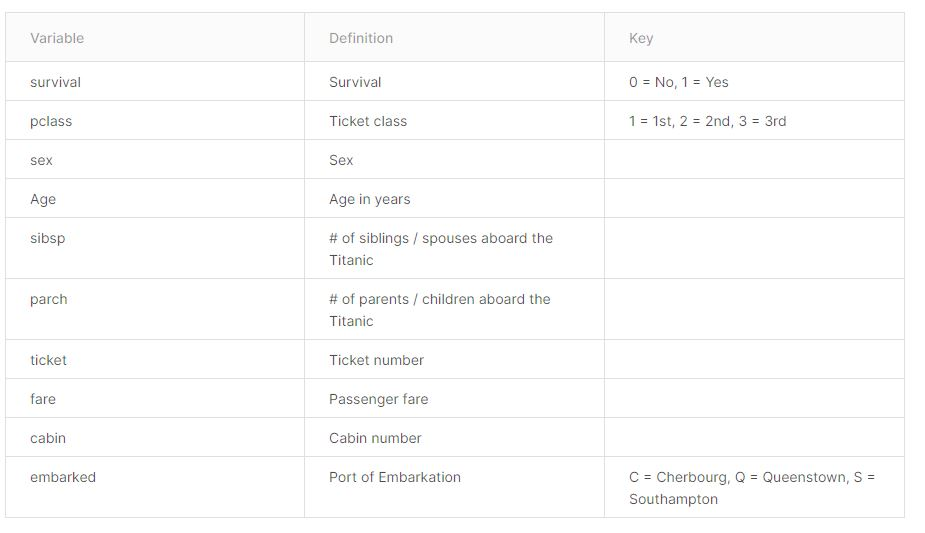

##Frequency analysis with crosstab
The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.

By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.



### Single dimention frequency analysis

In [11]:
#how many passengers were in each ticket class
class_freq_df = pd.crosstab(index=titanic_df.Pclass, columns=['Count'], colnames=['Item'])
class_freq_df

Item,Count
Pclass,
1,323
2,277
3,709


In [12]:
#sort df by index in descending order 
class_freq_df.sort_index(ascending=False, inplace=True)
class_freq_df

Item,Count
Pclass,
3,709
2,277
1,323


In [13]:
#sort df by column value in acending order
class_freq_df.sort_values(by='Count', ascending=True, inplace=True)
class_freq_df

Item,Count
Pclass,
2,277
1,323
3,709


In [14]:
#add a precentage column
class_perc_df = round(pd.crosstab(index=titanic_df.Pclass, columns='Percentage', colnames=['items'], normalize=True)*100, ndigits=2)
class_perc_df

items,Percentage
Pclass,
1,24.68
2,21.16
3,54.16


In [15]:
class_freq_df.insert(loc=len(class_freq_df.columns), column='Percentage', value=class_perc_df)
class_freq_df

Item,Count,Percentage
Pclass,,
2,277,24.68
1,323,21.16
3,709,54.16


###Multi-dimentional frequency analysis



In [16]:
#how many passengers were in each ticket class by gender?
class_freq_df = pd.crosstab(titanic_df.Pclass, titanic_df.Sex, margins=True)
class_freq_df

Sex,female,male,All
Pclass,,,
1,144,179,323
2,106,171,277
3,216,493,709
All,466,843,1309


In [17]:
#how many survived passengers in each ticket class?
class_freq_df = pd.crosstab([titanic_df.Pclass, titanic_df.Survived], columns='Count')
class_freq_df

col_0            Count
Pclass Survived       
1      0.0          80
       1.0         136
2      0.0          97
       1.0          87
3      0.0         372
       1.0         119

In [18]:
#how many survived passengers in each ticket class by gender?
class_freq_df = pd.crosstab([titanic_df.Pclass, titanic_df.Survived], titanic_df.Sex, margins=True)
class_freq_df

Sex              female  male  All
Pclass Survived                   
1      0.0            3    77   80
       1.0           91    45  136
2      0.0            6    91   97
       1.0           70    17   87
3      0.0           72   300  372
       1.0           72    47  119
All                 314   577  891

---
## Mean, Median, Variance, STD, Quratiles

In [19]:
#we can pull information by using each statistical function seperately
titanic_df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


PassengerId    655.000000
Survived         0.383838
Pclass           2.294882
Age             29.881138
SibSp            0.498854
Parch            0.385027
Fare            33.295479
WikiId         658.534509
Age_wiki        29.415829
Class            2.291411
dtype: float64

In [20]:
titanic_df.quantile(q=0.25)

PassengerId    328.0000
Survived         0.0000
Pclass           2.0000
Age             21.0000
SibSp            0.0000
Parch            0.0000
Fare             7.8958
WikiId         326.7500
Age_wiki        21.0000
Class            1.7500
Name: 0.25, dtype: float64

In [21]:
titanic_df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    655.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
WikiId         661.5000
Age_wiki        28.0000
Class            3.0000
dtype: float64

In [22]:
#or use the describe function
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


##Unique values and their counts breakdown
When we wish to know the number of distinct values in a categorical feature:

In [23]:
#How many passenger classes are there? what are they?
titanic_df.Pclass.unique()

array([3, 1, 2])

In [24]:
titanic_df.Pclass.nunique()

3

In [25]:
#And how many of each class?

titanic_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

## Detect missing data
We always must check if our data is complete before we can create models of it.

Missing data might affect the data analysis. What should you do when there is missing data? - will be covered in the **data preparation notebook**

In [26]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [27]:
# How many of the 'survived' feature are missing?
pd.crosstab(index=titanic_df.Survived.isnull(), columns='is null' , colnames=['data'])

data,is null
Survived,
False,891
True,418


In [28]:
#get missing rows of the Age feature
titanic_df[titanic_df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,...,S,604.0,"Williams, Mr. Charles Eugene",23.0,"Harrow, London, England",Southampton,"Chicago, Illinois, US",14,NaN,2.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,...,C,1053.0,"Muslamani, Mrs. Fatimah",22.0,"Tebnine, Lebanon",Cherbourg,"Michigan City, Indiana, US",C,NaN,3.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,...,C,1205.0,"Shihab, Mr. Amir Faris",25.0,"Hadath, Lebanon",Cherbourg,New York City,NaN,NaN,3.0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,...,Q,1086.0,"O'Dwyer, Miss Ellen ""Nellie""",25.0,"Limerick, Limerick, Ireland",Queenstown,New York City,?,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,...,Q,1154.0,"Riordan, Miss Hannah",18.0,"Glenlougha, Cork, Ireland",Queenstown,New York City,13,NaN,3.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,...,Q,1064.0,"Naughton, Miss Hannah",21.0,"Donoughmore, Ireland",Queenstown,New York City,NaN,NaN,3.0
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [29]:
##detect missing rows of any feature
titanic_df[titanic_df.isnull().any(axis='columns')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [30]:
len(titanic_df)

1309

---
##Group By
The groupby method allows you to group rows of data together and call aggregate functions The 'groupby' function return an dictionary like object that seperated the original dataframe into groups based on the desired feature.



In [31]:
#group the df by the Boarded feature
groups_df = titanic_df.groupby('Boarded')
print(titanic_df.Boarded.unique())

['Southampton' 'Cherbourg' 'Queenstown' 'Belfast' nan]


In [32]:
for group_name, group_df in groups_df:
    print(group_name)
    print(group_df.head())

Belfast
     PassengerId  Survived  Pclass                              Name   Sex  \
170          171       0.0       1         Van der hoef, Mr. Wyckoff  male   
277          278       0.0       2       Parkes, Mr. Francis "Frank"  male   
413          414       0.0       2    Cunningham, Mr. Alfred Fleming  male   
466          467       0.0       2             Campbell, Mr. William  male   
481          482       0.0       2  Frost, Mr. Anthony Wood "Archie"  male   

      Age  SibSp  Parch  Ticket  Fare  ... Embarked WikiId  \
170  61.0      0      0  111240  33.5  ...        S  303.0   
277   NaN      0      0  239853   0.0  ...        S  534.0   
413   NaN      0      0  239853   0.0  ...        S  390.0   
466   NaN      0      0  239853   0.0  ...        S  368.0   
481   NaN      0      0  239854   0.0  ...        S  414.0   

                                Name_wiki Age_wiki  \
170             Van der Hoef, Mr. Wyckoff     61.0   
277       Parkes, Mr. Francis "Frank"[60] 

###Operations on groups
We can now analyse the dataframe by its groups

In [33]:
groups_df.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
Boarded,,,,,,,,,,
Belfast,581.900000,0.000000,1.600000,50.000000,0.000000,0.000000,3.350000,338.600000,32.000000,1.600000
Cherbourg,678.142857,0.560241,1.864865,32.212792,0.424710,0.351351,60.225210,502.733591,31.125175,1.857143
Queenstown,663.823529,0.381579,2.949580,27.521739,0.319328,0.117647,10.455288,920.268908,25.436975,2.949580
Southampton,647.069869,0.343260,2.339520,29.396930,0.550218,0.432314,28.778810,672.077511,29.424934,2.336245


In [34]:
# It is possible to do grouping with multiple columns.
titanic_df.groupby(['Boarded', 'Survived']).mean()

PassengerId    Pclass        Age     SibSp     Parch  \
Boarded     Survived                                                         
Belfast     0.0        517.888889  1.666667  50.000000  0.000000  0.000000   
Cherbourg   0.0        408.301370  2.232877  34.122449  0.273973  0.219178   
            1.0        468.365591  1.602151  29.543291  0.526882  0.451613   
Queenstown  0.0        490.000000  2.978723  30.325000  0.468085  0.276596   
            1.0        316.758621  2.931034  21.000000  0.275862  0.000000   
Southampton 0.0        447.152745  2.556086  30.048159  0.625298  0.362768   
            1.0        451.515982  1.963470  28.131127  0.474886  0.534247   

                           Fare      WikiId   Age_wiki     Class  
Boarded     Survived                                              
Belfast     0.0        3.722222  367.777778  31.111111  1.666667  
Cherbourg   0.0       30.106108  634.000000  32.718310  2.219178  
            1.0       83.097805  381.698925  29.184624  1.602151  
Queenstown  0.0       11.592287  943.276596  26.829787  2.978723  
            1.0       10.533338  928.586207  23.758621  2.931034  
Southampton 0.0       21.811722  775.940334  29.701671  2.556086  
            1.0       38.819939  502.867580  28.751142  1.958904

##Pivot table
Python Pandas function pivot_table help us with the summarization and conversion of dataframe in long form to dataframe in wide form, in a variety of complex scenarios.

In Pandas, the pivot table function takes simple data frame as input, and performs grouped operations that provides a multidimensional summary of the data. Yes, in a way, it is related Pandas group_by function.      


The simplest pivot table must have a dataframe and an index . In this case, let’s use the Passenger class as our index.



In [35]:
#pivot the df so the index is the Pclass
#default aggregation function is 'mean'
pd.pivot_table(data=titanic_df, index=['Pclass'],aggfunc=np.std) 

,Age,Age_wiki,Class,Fare,Parch,PassengerId,SibSp,Survived,WikiId
Pclass,,,,,,,,,
1,14.548028,13.601945,0.000000,80.447178,0.715602,368.725700,0.609064,0.484026,93.894076
2,13.638627,13.369073,0.133375,13.607122,0.692717,383.707495,0.590100,0.500623,95.657139
3,11.958202,11.477991,0.000000,11.494358,0.981639,379.887782,1.299681,0.428949,204.369047


In [36]:
#if we are interested in part of the information we can state it in the values parameter
pd.pivot_table(data=titanic_df, index=['Pclass', 'Boarded'], values=['SibSp']) 

SibSp
Pclass Boarded              
1      Belfast      0.000000
       Cherbourg    0.429630
       Southampton  0.456044
2      Belfast      0.000000
       Cherbourg    0.583333
       Queenstown   0.000000
       Southampton  0.394191
3      Cherbourg    0.380000
       Queenstown   0.336283
       Southampton  0.661258

In [37]:
#aggfunc can take a list of functions. Let’s try a mean using the numpy mean function and len to get a count.
pd.pivot_table(data=titanic_df, index=['Pclass', 'Boarded'], values=['SibSp'], aggfunc=[np.mean, len], margins=True) 

mean   len
                       SibSp SibSp
Pclass Boarded                    
1      Belfast      0.000000     4
       Cherbourg    0.429630   135
       Southampton  0.456044   182
2      Belfast      0.000000     6
       Cherbourg    0.583333    24
       Queenstown   0.000000     6
       Southampton  0.394191   241
3      Cherbourg    0.380000   100
       Queenstown   0.336283   113
       Southampton  0.661258   493
All                 0.500000  1304

In [38]:
#an additional splitting of the data can be acomplished by introducing a 'columns' property
pivot_df = pd.pivot_table(data=titanic_df, index=['Pclass', 'Boarded'], values=['SibSp'], columns=['Survived'], aggfunc=[np.mean, len]) 
pivot_df

mean              len      
                       SibSp            SibSp      
Survived                 0.0       1.0    0.0   1.0
Pclass Boarded                                     
1      Belfast      0.000000       NaN    3.0   NaN
       Cherbourg    0.208333  0.508197   24.0  61.0
       Southampton  0.346154  0.480000   52.0  75.0
2      Belfast      0.000000       NaN    6.0   NaN
       Cherbourg    0.625000  0.625000    8.0   8.0
       Queenstown   0.000000  0.000000    1.0   2.0
       Southampton  0.317073  0.493506   82.0  77.0
3      Cherbourg    0.243902  0.541667   41.0  24.0
       Queenstown   0.478261  0.296296   46.0  27.0
       Southampton  0.764912  0.447761  285.0  67.0

In [39]:
pivot_df.columns

MultiIndex([('mean', 'SibSp', 0.0),
            ('mean', 'SibSp', 1.0),
            ( 'len', 'SibSp', 0.0),
            ( 'len', 'SibSp', 1.0)],
           names=[None, None, 'Survived'])